In [2]:
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import os
import collections
import pandas as pd
import seaborn as sns
import matplotlib as mp
from matplotlib.ticker import FormatStrFormatter
from matplotlib.colors import LinearSegmentedColormap

sns.set()
# Read simulation files
def datafileread(measurename,skipfirstrows):
    # Reading Datafiles
    path = measurename
    data = np.genfromtxt(path,
                        skip_header=skipfirstrows,
                        delimiter=',',
                        dtype=(float,float),
                        unpack=True)
    return data

# measurement
length,amplitude,width, dummy = datafileread('black_box.csv',14)

width *= 1e9
length = np.round(length * 1e9, decimals=1)
#inputAmplitude = np.round(inputAmplitude, decimals=1)
#print(inputAmplitude)

width = [x if x > 1000 else np.NaN for x in width]

df = pd.DataFrame({'x': length, 'y': amplitude, 'z': width})
df = df.pivot(index='y',columns='x', values='z')
print(df)


x        1.0       2.2      4.6      10.0     21.5     46.4     100.0   \
y                                                                        
-500.0  29616.3  29927.50      NaN  30461.0  31024.4  31331.7  31656.4   
-490.0  29411.3  29909.50      NaN  30437.7  31029.1  31320.4  31647.4   
-480.0  29045.9       NaN  29951.8  30453.2  31006.7  31314.8  31638.7   
-470.0  28548.5       NaN  29954.2  30432.7  30998.6  31328.8  31614.6   
-460.0  27863.5       NaN      NaN  30416.6  30995.0  31318.1  31605.6   
-450.0  27030.3  29940.40  29944.7  30422.0  30969.7  31285.7  31592.6   
-440.0      NaN       NaN      NaN  30409.0  30945.0  31296.5  31582.3   
-430.0      NaN       NaN  29930.0  30377.0  30938.3  31266.1  31568.8   
-420.0      NaN  29941.90  29910.9  30370.1  30902.1  31259.2  31554.5   
-410.0      NaN       NaN  29905.2  30356.2  30901.4  31245.0  31544.5   
-400.0      NaN       NaN  29926.9      NaN      NaN  31250.2  31527.0   
-390.0      NaN       NaN  29907.3  30

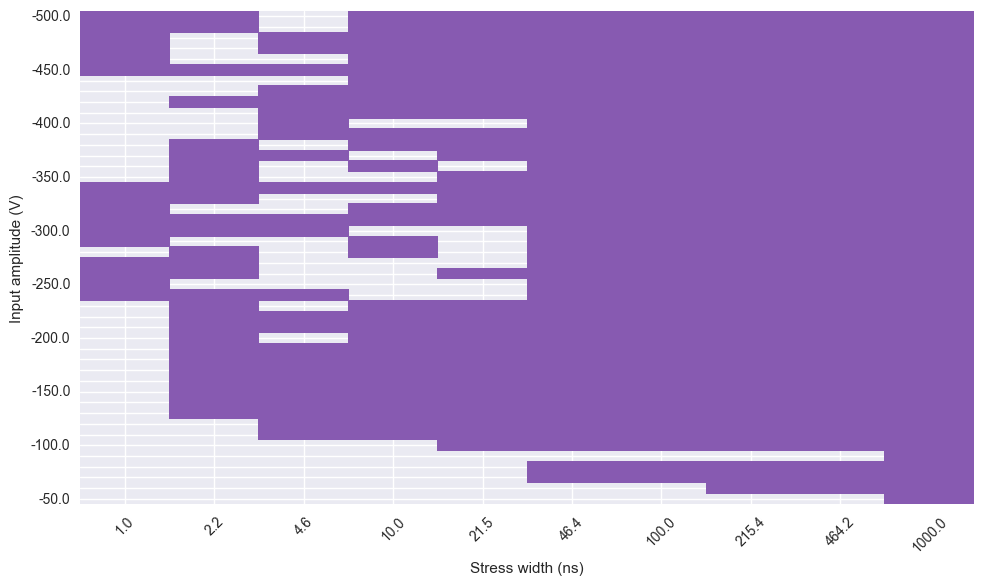

In [3]:
plt.figure(figsize=(10,6))

colors = ["#875ab1","#875ab1"]

# Create the colormap
cm = LinearSegmentedColormap.from_list("static", colors, N=2)

# Remove some yticks, otherwise they are too many
yticks = df.index
yticks = [str(x) if i % 5 == 0 else '' for i,x in enumerate(yticks)]


ax = sns.heatmap(df, cmap=cm, cbar=False, yticklabels=yticks)
ax.set_xlabel("Stress width (ns)")
ax.set_ylabel("Input amplitude (V)")
plt.grid(True, which="both")

# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(0)

for item in ax.get_xticklabels():
    item.set_rotation(45)


    
#ax.set_title("Failure on output v2p5a for a given input stress width (x-axis) and stress amplitude (y-axis)")
plt.plot()
plt.tight_layout()
plt.savefig("../../src/4/figures/black_box_regulator.png", pad_inches=0.3)
plt.show()